In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [15]:
# Variables
col0 = ['Corrected time (s)', 'WE(1).Potential (V)', 'WE(1).Current (A)', 'WE(1).Charge (C)']
col = ['Time (s)', 'Potential vs Ag/AgCl (V)', 'Current Density (A/cm$^2$)']
ax2_label = 'Potential vs Li$^+$/Li (V)'

cmap = 'Set1'

# Functions
def galv_dep(path):
    files = [os.path.join(path, i) for i in os.listdir(path)]
    
    result = pd.DataFrame()
    for i in files:
        directory, filename = os.path.split(i)
        name = filename.split('.txt')[0].split('_0')[0]
        name = name.replace('_', '/')
        df = pd.read_csv(i, sep = '\t')
        df['Sample'] = name
        df[ax2_label] = df[col0[1]] + 3.05 + 0.22
        
        result = pd.concat([result, df], ignore_index = True)
    
    return result
    
def gd_plot(df, hue, dpi):
    
    fig, ax = plt.subplots(dpi = dpi)
    ax2 = ax.twinx()
    sns.scatterplot(data = df, x = col0[0], y = col0[1], hue = hue, edgecolor = None, s = 5, palette = cmap, ax = ax)
    sns.scatterplot(data = df, x = col0[0], y = ax2_label, hue = hue, edgecolor = None, s = 5, palette = cmap, ax = ax2, legend = False)
    
    ax.set_xlabel(col[0])
    ax.set_ylabel(col[1])
    ax.legend(ncol = 2)


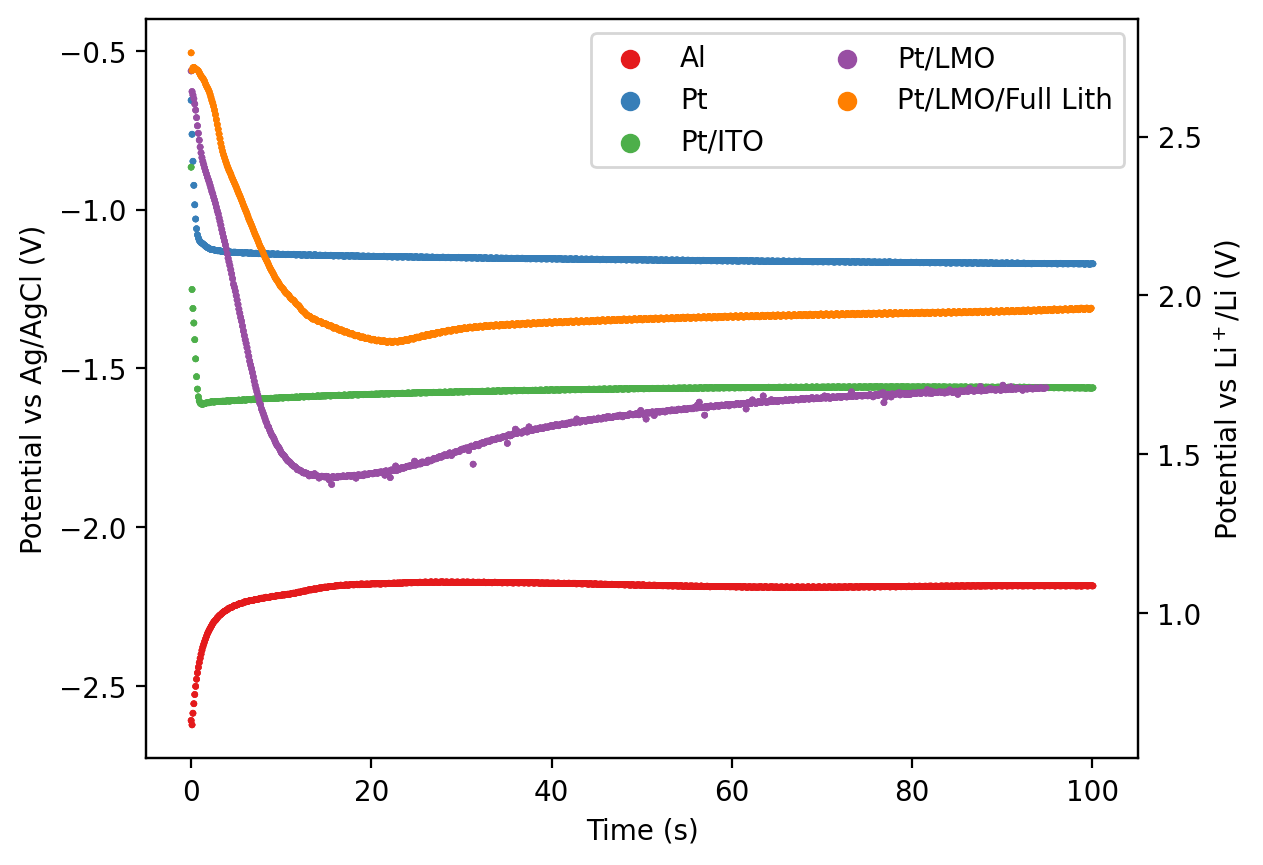

In [16]:
# Galvanostatic Deposition on Substrates

area = np.pi * 0.75 **2 # cm2
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\Galvanostatic Deposition\Mimic on substrates'

susbtrates = galv_dep(path)
gd_plot(susbtrates, 'Sample', 200)

# print(susbtrates[col0[2]] / area)